In [18]:
import numpy as np
from scipy import optimize
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [26]:
import plotly

ImportError: cannot import name exceptions

# Utility w/ N_bar

In [6]:
# utility function
def utility(x):
    return np.sqrt(x)

# have grid of n bars, and find max N
# def N_bar(N):
#     print('Nbar')
#     return 300 + N/300

# take n_bar as fixed
# how do n and nbar interact?
# finding where n=nbar such that the n that it induces is consistent with that n_bar
# firms are setting prices, induces some in

# ransom, R
def ransom(N, N_bar):
    return 10000/(N_bar+1) + 2000/(N+1) - 2000

# insurance premium, P
def premium(p, R):
    return p*R

# probability of death, q
def p_death(N):
    return N / (100+N)

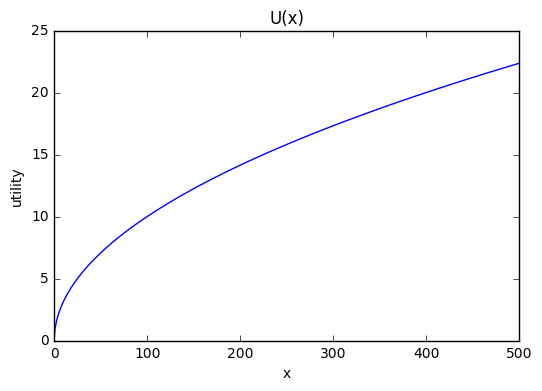

In [7]:
# utility function properties

x = np.arange(0, 500, 0.01)
u_y = utility(x)
plt.plot(x, u_y)
plt.title('U(x)')
plt.xlabel('x')
plt.ylabel('utility')
plt.show()

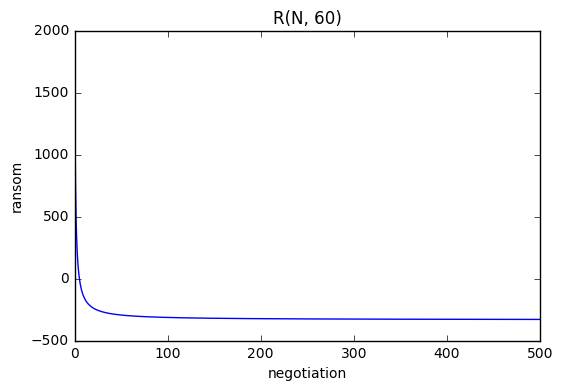

In [8]:
# ransom function properties
# 

r_y = ransom(x, 5)
plt.plot(x, r_y)
plt.title('R(N, 60)')
plt.ylabel('ransom')
plt.xlabel('negotiation')
# plt.axis([0, 500, 90, 100])
plt.show()

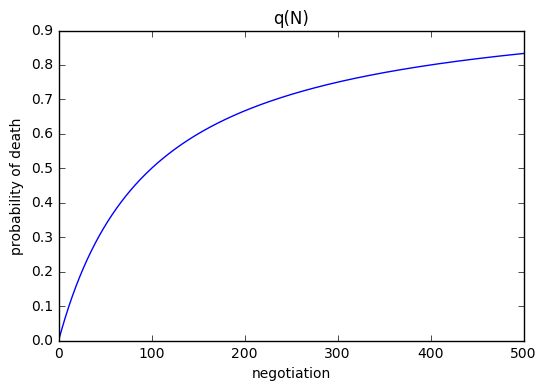

In [9]:
# death function properties

d_y = p_death(x)
plt.plot(x, d_y)
plt.title('q(N)')
plt.xlabel('negotiation')
plt.ylabel('probability of death')
plt.show()


In [10]:
# expected utility function with p, W, D, K, N, N_bar as exogenous variables
xvals = np.arange(0, 500, .01)

def expected_utility(p, W, D, K, N, N_bar):
    P = premium(p, ransom(N, N_bar))
    return (1-p)*utility(W-P) + \
            p*p_death(N)*utility(W-P-D) + \
            p*(1-p_death(N))*utility(W-P-K)

In [11]:
# setting exogenous variables
p = .05
W = 10000
D = 9000
K = 3000
N_bar = 50

# function of N
def U(N, N_bar):
    return expected_utility(p, W, D, K, N, N_bar)

In [12]:
U(50, 50)

99.627853997961608

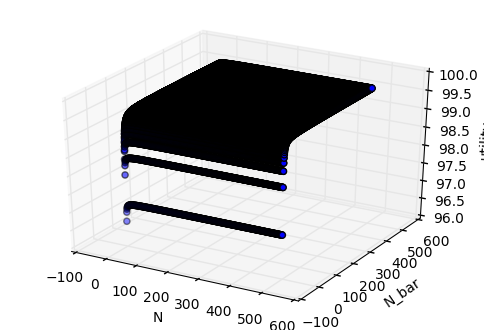

In [13]:
# plot function
N_bar_vals = np.arange(1, 501, .01)
yvals = U(xvals, N_bar_vals)
# Axes3D.scatter(xs, ys, zs=0)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
n = 500
xs = [i for i in range(n) for _ in range(n)]
ys = range(n) * n
zs = [U(x, y) for x,y in zip(xs,ys)]

ax.scatter(xs, ys, zs)

ax.set_xlabel('N')
ax.set_ylabel('N_bar')
ax.set_zlabel('utility')

plt.show()

# plt.plot(xvals, yvals)
# plt.xlabel('negotiation')
# plt.ylabel('utility')
# plt.axis([0, 500, 95, 100])
# plt.show()

In [69]:
# negotiation yielding the max utility
i = np.nanargmax(yvals)
max_negotiation = xvals[i]

print 'max utility =', yvals[i]
print 'max negotiation=', max_negotiation
print 'max n_bar=', N_bar_vals[i]

max utility = 99.1972462478
max negotiation= 10.16
max n_bar= 11.16


# Utility w/ N_bar

ImportError: cannot import name exceptions

In [ ]:

# literature review-- if another student were to pick up trail, write summary of lit review
# get data for explanatory stuff